In [2]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import glob
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats
import datatable as dt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
script_dir = os.path.dirname(r'/home/argo/data/' )
results_dir = os.path.join(script_dir, 'Results/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [40]:
f = open("/home/argo/IMPISH/Data/xray_beam/cryst-out30.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

        Energy    y
0      30.0000 -1.0
1      30.0000 -1.0
2      30.0000 -1.0
3      29.8697 -1.0
4      30.0000 -1.0
...        ...  ...
91522  30.0000 -1.0
91523  30.0000 -1.0
91524  30.0000 -1.0
91525  30.0000 -1.0
91526  30.0000 -1.0

[91527 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

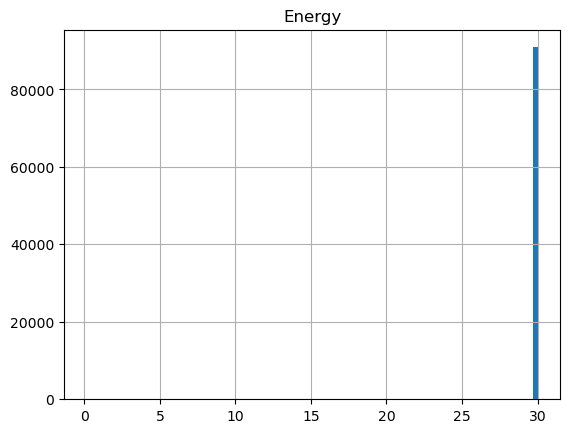

In [43]:
df.hist(column = "Energy", bins = 100)

In [4]:
folder_path = r'/home/argo/IMPISH/Data/xray_beam/'

def xray_tab_combiner(input_directory, output_file):
    headers = []
    rows = []

    #Iterates through all the files in the input directory
    for file_name in os.listdir(input_directory):
        if file_name.endswith('.tab'):
            file_path = os.path.join(input_directory, file_name)

            with open(file_path, 'r', encoding = 'utf-8') as file:
                lines = file.readlines()
                if lines:
                    #Will store the header from the first file
                    if not headers:
                        headers = lines[0].strip().split('\t')
                        rows.append('\t'.join(headers))
                    #Skips the lines in subsequent files (Change to 0 if your files dont have a header)
                    data_lines = lines[0:]
                    rows.extend(data_lines)

    #Writes all rows to an output file
    with open(output_file, 'w', encoding = 'utf-8') as output:
        output.writelines(rows)



In [6]:
xray_tab_combiner(folder_path, 'xrays_combined.tab')

In [7]:
f = open("/home/argo/IMPISH/Data/xray_beam/xrays_combined.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

           Energy    y
0         6.00000 -1.0
1         6.00000 -1.0
2         6.00000 -1.0
3         6.00000 -1.0
4         6.00000 -1.0
...           ...  ...
1144566   2.74751 -1.0
1144567  26.00000 -1.0
1144568  26.00000 -1.0
1144569  26.00000 -1.0
1144570  26.00000 -1.0

[1144571 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

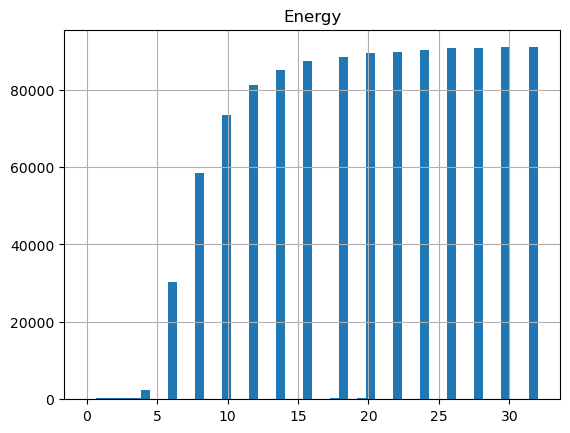

In [9]:
df.hist(column = "Energy", bins = 50)

In [11]:
def find_and_combine_tab_files(root_directory, file_name, output_file):
    headers = []
    rows = []
    header_written = False

    for dirpath, dirnames, filenames in os.walk(root_directory):
        if file_name in filenames:
            file_path = os.path.join(dirpath, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                if lines:
                    if not header_written:
                        headers = lines[0].strip()
                        rows.append(headers)
                        header_written = True
                    rows.extend(lines[0:])
    
    with open(output_file, 'w', encoding='utf-8') as output:
        output.writelines(rows)

In [12]:
root_directory = r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/'
file_name = 'cryst-out.tab'
output_file = r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/xray-energies.tab'

find_and_combine_tab_files(root_directory, file_name, output_file)

In [13]:
xray_tab_combiner(r'/home/argo/IMPISH/Data/xray_beam/xray_beam_run/', 'total-xray.tab')

In [15]:
f = open("/home/argo/IMPISH/Data/xray_beam/xray_beam_run/total-xray.tab", "r")
data = f.read()
#print (data)

data = data.replace(" ", ",") #Adds in a comma separater in front of the multiple 1s
data = data.replace(",", ", ") #Adds in space for the data
dat = np.loadtxt(StringIO(data), dtype=float, delimiter=",")
#print(dat.shape)
#print(dat)

hist_values = ["Energy", "y"]

df = pd.DataFrame(data = dat, columns = hist_values)
print(df)

           Energy    y
0        40.00000 -1.0
1        40.00000 -1.0
2        40.00000 -1.0
3        40.00000 -1.0
4        40.00000 -1.0
...           ...  ...
2709209   2.74751 -1.0
2709210  26.00000 -1.0
2709211  26.00000 -1.0
2709212  26.00000 -1.0
2709213  26.00000 -1.0

[2709214 rows x 2 columns]


array([[<AxesSubplot:title={'center':'Energy'}>]], dtype=object)

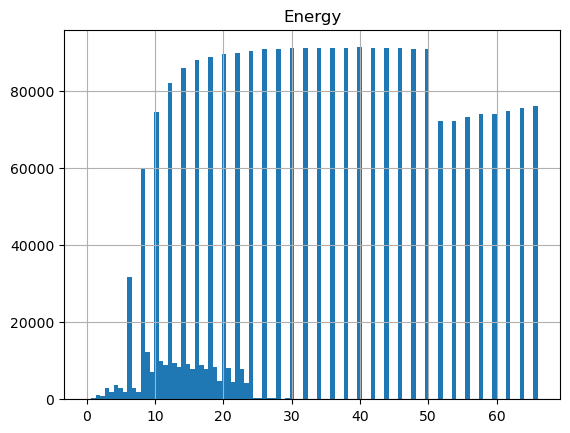

In [16]:
df.hist(column = "Energy", bins = 100, )

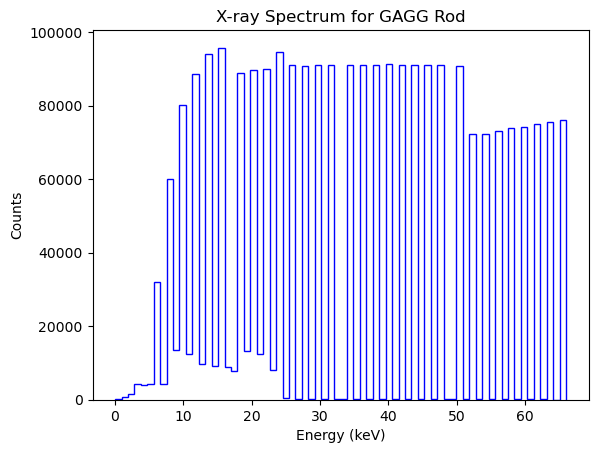

In [20]:
plt.hist(df['Energy'], bins = 70, histtype = 'step', edgecolor = 'blue')

plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('X-ray Spectrum for GAGG Rod')

plt.show()

In [ ]:
#Need to make it 